## Install

In [ ]:
!pip install pgmpy
#https://github.com/pgmpy/pgmpy
#https://www.kaggle.com/lajq26/titanic-causal-analysis
#https://www.bnlearn.com/bnrepository/

In [ ]:
!apt-get install graphviz graphviz-dev
!pip install pygraphviz

## Defining a model

In [ ]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
from pgmpy.models import BayesianModel
from pgmpy.factors.discrete import TabularCPD

model = BayesianModel([('A', 'J'), ('R', 'J'), ('J', 'Q'), ('J', 'L'), ('G', 'L')])
cpd_a = TabularCPD('A', 2, values=[[0.2], [0.8]])
cpd_r = TabularCPD('R', 2, values=[[0.4], [0.6]])
cpd_j = TabularCPD('J', 2, values=[[0.9, 0.6, 0.7, 0.1],
                                   [0.1, 0.4, 0.3, 0.9]],
                  evidence=['A', 'R'], evidence_card=[2, 2])
cpd_q = TabularCPD('Q', 2, values=[[0.9, 0.2], [0.1, 0.8]],
                  evidence=['J'], evidence_card=[2])
cpd_l = TabularCPD('L', 2, values=[[0.9, 0.45, 0.8, 0.1],
                                   [0.1, 0.55, 0.2, 0.9]],
                  evidence=['J', 'G'], evidence_card=[2, 2])
cpd_g = TabularCPD('G', 2, values=[[0.6], [0.4]])

model.add_cpds(cpd_a, cpd_r, cpd_j, cpd_q, cpd_l, cpd_g)

/usr/local/lib/python3.7/dist-packages/pgmpy/models/BayesianModel.py:10: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  FutureWarning,


In [ ]:
# We can now call some methods on the BayesianModel object.
model.get_cpds()[1]

<TabularCPD representing P(R:2) at 0x7fd4df25a090>

In [ ]:
model.edges
# model.variable_names

OutEdgeView([('A', 'J'), ('J', 'Q'), ('J', 'L'), ('R', 'J'), ('G', 'L')])

In [ ]:
model.nodes

NodeView(('A', 'J', 'R', 'Q', 'L', 'G'))

## Plot BN Graph

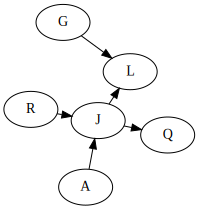

In [ ]:
import networkx as nx
from IPython.display import SVG, display
G2 = nx.DiGraph()
G2.add_nodes_from(model.nodes)
G2.add_edges_from(model.edges)

svg2 = SVG(nx.nx_agraph.to_agraph(G2).draw(prog='fdp', format='svg'))
display(svg2)

## Find Independencies

In [ ]:
model.local_independencies("J")

(J ⟂ G | R, A)

In [ ]:
model.get_independencies()

(R ⟂ G, A)
(R ⟂ G | A)
(R ⟂ G | Q)
(R ⟂ A | G)
(R ⟂ G, L, Q | J)
(R ⟂ G | Q, A)
(R ⟂ G, L, Q | A, J)
(R ⟂ G, L | Q, J)
(R ⟂ L, Q | G, J)
(R ⟂ G, Q | L, J)
(R ⟂ G, L | Q, A, J)
(R ⟂ L, Q | G, A, J)
(R ⟂ G, Q | L, A, J)
(R ⟂ L | G, Q, J)
(R ⟂ G | L, Q, J)
(R ⟂ Q | G, L, J)
(R ⟂ L | G, Q, A, J)
(R ⟂ G | Q, L, A, J)
(R ⟂ Q | G, L, A, J)
(Q ⟂ G)
(Q ⟂ G | R)
(Q ⟂ G | A)
(Q ⟂ G, R, L, A | J)
(Q ⟂ G | R, A)
(Q ⟂ G, L, A | R, J)
(Q ⟂ G, R, L | A, J)
(Q ⟂ R, L, A | G, J)
(Q ⟂ G, R, A | L, J)
(Q ⟂ G, L | R, A, J)
(Q ⟂ L, A | G, R, J)
(Q ⟂ G, A | R, L, J)
(Q ⟂ R, L | G, A, J)
(Q ⟂ G, R | L, A, J)
(Q ⟂ R, A | G, L, J)
(Q ⟂ L | G, R, A, J)
(Q ⟂ G | R, L, A, J)
(Q ⟂ A | G, R, L, J)
(Q ⟂ R | G, L, A, J)
(A ⟂ G, R)
(A ⟂ G | R)
(A ⟂ G | Q)
(A ⟂ R | G)
(A ⟂ G, L, Q | J)
(A ⟂ G | R, Q)
(A ⟂ G, L, Q | R, J)
(A ⟂ G, L | Q, J)
(A ⟂ L, Q | G, J)
(A ⟂ G, Q | L, J)
(A ⟂ G, L | R, Q, J)
(A ⟂ L, Q | G, R, J)
(A ⟂ G, Q | R, L, J)
(A ⟂ L | G, Q, J)
(A ⟂ G | L, Q, J)
(A ⟂ Q | G, L, J)
(A ⟂ L | G, R, Q, J)
(A ⟂ G | R

## Variable Elimination

In [ ]:
from pgmpy.inference import VariableElimination

infer = VariableElimination(model)
posterior_p = infer.query(["A"], evidence={"R": 0, "Q": 1})
print(posterior_p)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+------+----------+
| A    |   phi(A) |
+======+==========+
| A(0) |   0.1206 |
+------+----------+
| A(1) |   0.8794 |
+------+----------+


## D-Separation & Active Trail

In [ ]:
# Check for d-separation between variables
print(model.is_dconnected("J", "G"))
print(model.is_dconnected("G", "J", observed=["L"]))
model.active_trail_nodes("J")

False
True


{'J': {'A', 'J', 'L', 'Q', 'R'}}

## Inference

In [ ]:
# Computing the joint probability of bronc and asia given smoke=yes

infer = VariableElimination(model)
q = infer.query(variables=["G", "J"], evidence={"R": 0})
print(q)

# Computing the probabilities (not joint) of bronc and asia given smoke=no
q = infer.query(variables=["G", "J"], evidence={"R": 1}, joint=False)
for factor in q.values():
    print(factor)

  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+------+------+------------+
| G    | J    |   phi(G,J) |
+======+======+============+
| G(0) | J(0) |     0.4440 |
+------+------+------------+
| G(0) | J(1) |     0.1560 |
+------+------+------------+
| G(1) | J(0) |     0.2960 |
+------+------+------------+
| G(1) | J(1) |     0.1040 |
+------+------+------------+


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+------+----------+
| G    |   phi(G) |
+======+==========+
| G(0) |   0.6000 |
+------+----------+
| G(1) |   0.4000 |
+------+----------+
+------+----------+
| J    |   phi(J) |
+======+==========+
| J(0) |   0.2000 |
+------+----------+
| J(1) |   0.8000 |
+------+----------+


In [ ]:
# Non adjusted inference
infer_non_adjust = VariableElimination(model)
print(infer_non_adjust.query(variables=["L"], evidence={"R": 1}))
print(infer_non_adjust.query(variables=["L"], evidence={"R": 0}))

  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

+------+----------+
| L    |   phi(L) |
+======+==========+
| L(0) |   0.5600 |
+------+----------+
| L(1) |   0.4400 |
+------+----------+


  0%|          | 0/3 [00:00<?, ?it/s]

  0%|          | 0/3 [00:00<?, ?it/s]

+------+----------+
| L    |   phi(L) |
+======+==========+
| L(0) |   0.6680 |
+------+----------+
| L(1) |   0.3320 |
+------+----------+


In [ ]:
from pgmpy.inference import CausalInference
infer_adjusted = CausalInference(model)
print(infer_adjusted.query(variables=["L"], do={"R": 1}))
print(infer_adjusted.query(variables=["L"], do={"R": 0}))

+------+----------+
| L    |   phi(L) |
+======+==========+
| L(0) |   0.5600 |
+------+----------+
| L(1) |   0.4400 |
+------+----------+
+------+----------+
| L    |   phi(L) |
+======+==========+
| L(0) |   0.6680 |
+------+----------+
| L(1) |   0.3320 |
+------+----------+


## Example Model

In [ ]:
from pgmpy.utils import get_example_model

In [ ]:
#water , diabetes
diab_model = get_example_model('water')

In [ ]:
import networkx as nx
from IPython.display import SVG, display
G2 = nx.DiGraph()
G2.add_nodes_from(diab_model.nodes)
G2.add_edges_from(diab_model.edges)

svg2 = SVG(nx.nx_agraph.to_agraph(G2).draw(prog='fdp', format='svg'))
display(svg2)

## Load Network from bif file

In [ ]:
from pgmpy.readwrite import BIFReader
reader = BIFReader("insurance.bif")

In [ ]:
reader.get_edges()
reader.variable_names

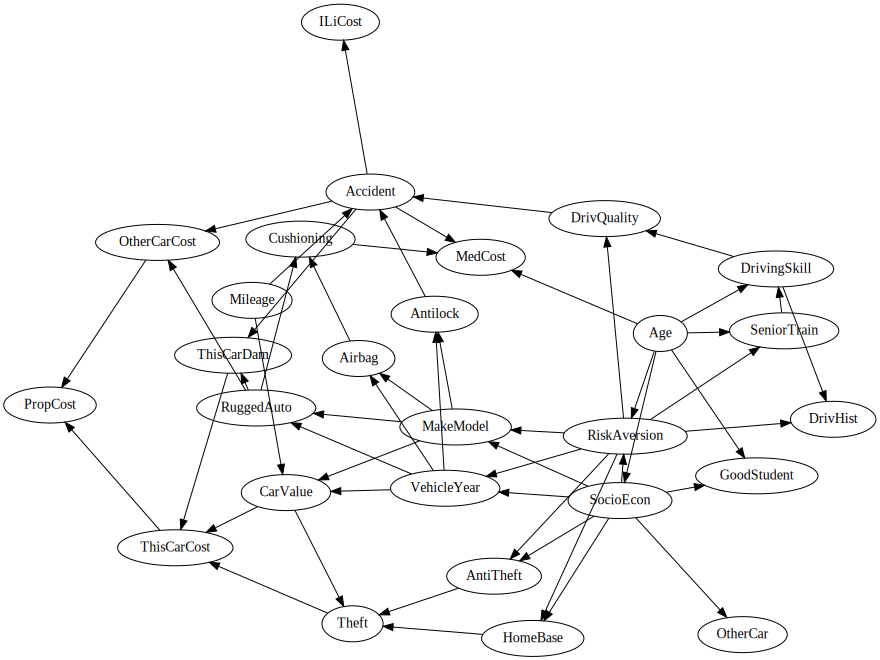

In [ ]:
import networkx as nx
from IPython.display import SVG, display
G2 = nx.DiGraph()
G2.add_nodes_from(reader.variable_names)
G2.add_edges_from(reader.get_edges())

svg2 = SVG(nx.nx_agraph.to_agraph(G2).draw(prog='fdp', format='svg'))
display(svg2)

In [ ]:
reader.get_model()

## Markov network

In [ ]:
from pgmpy.models import MarkovNetwork
from pgmpy.factors.discrete import DiscreteFactor
import numpy as np
student = MarkovNetwork([('Alice', 'Bob'), ('Bob', 'Charles'),('Charles', 'Debbie'),( 'Debbie','Alice')])
factor = DiscreteFactor(['Alice', 'Bob'], cardinality=[2, 2],
                values=np.random.rand(4))
student.add_factors(factor)
student.remove_factors(factor)

In [ ]:
student.edges
student.nodes

NodeView(('Alice', 'Bob', 'Charles', 'Debbie'))

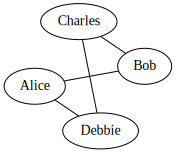

In [ ]:
import networkx as nx
from IPython.display import SVG, display
G2 = nx.Graph()
G2.add_nodes_from(student.nodes)
G2.add_edges_from(student.edges)

svg2 = SVG(nx.nx_agraph.to_agraph(G2).draw(prog='fdp', format='svg'))
display(svg2)

## Model Conversion

/usr/local/lib/python3.7/dist-packages/pgmpy/models/MarkovNetwork.py:448: RuntimeWarning: invalid value encountered in long_scalars
  S_by_C = {key: S[key] / C[key] for key in S}


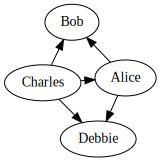

In [ ]:
bm = student.to_bayesian_model()
G2 = nx.DiGraph()
G2.add_nodes_from(bm.nodes)
G2.add_edges_from(bm.edges)

svg2 = SVG(nx.nx_agraph.to_agraph(G2).draw(prog='fdp', format='svg'))
display(svg2)

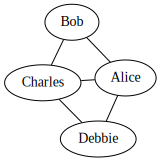

In [ ]:
mn = bm.to_markov_model()
G2 = nx.Graph()
G2.add_nodes_from(mn.nodes)
G2.add_edges_from(mn.edges)

svg2 = SVG(nx.nx_agraph.to_agraph(G2).draw(prog='fdp', format='svg'))
display(svg2)

## Next Steps

- Literature Survey Bayesian Networks & Markov networks.
- Other Related Dataset.
- List down techniques used to build the Network from Data.
- Comparison with decision Tree, Naive Bayes, Logistic regression, Deep learning & GNN
- Comparison with other methods explained in the course.

## Papers

- [Bayesian Network on Diabetes](https://ieeexplore.ieee.org/abstract/document/9280179)
- [Bayesian Network on OCD](https://www.cambridge.org/core/journals/psychological-medicine/article/comorbid-obsessivecompulsive-disorder-and-depression-a-bayesian-network-approach/DAA4E2352A9E26809A4EAE35C366E900)